<a href="https://colab.research.google.com/github/Arju-cmd/NLP_Models/blob/main/Tensorflow_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!nvidia-smi

Tue Aug  3 10:13:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  !pip uninstall tb-nightly tensorboardX tensorboard
  #!pip install tf-nightly
  !pip install tensorflow==2.2.0
except Exception:
  pass
import tensorflow as tf

import os
import datetime
import tensorflow_datasets as tfds

%load_ext tensorboard

Found existing installation: tensorboard 2.5.0
Uninstalling tensorboard-2.5.0:
  Would remove:
    /usr/local/bin/tensorboard
    /usr/local/lib/python3.7/dist-packages/tensorboard-2.5.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorboard/*
Proceed (y/n)? y
  Successfully uninstalled tensorboard-2.5.0
     |████████████████████████████████| 516.2 MB 4.5 kB/s 
     |████████████████████████████████| 454 kB 60.1 MB/s 
     |████████████████████████████████| 3.0 MB 26.2 MB/s 
     |████████████████████████████████| 2.9 MB 54.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.

In [7]:
import pkg_resources

for entry_point in pkg_resources.iter_entry_points('tensorboard_plugins'):
    print(entry_point.dist)

tensorboard 2.5.0
tensorboard-plugin-wit 1.8.0


In [8]:
#!ls -alrt /usr/local/lib/python3.6/dist-packages/tensorboard*
!rm -r /usr/local/lib/python3.6/dist-packages/tensorboardcolab-0.0.22.dist-info

rm: cannot remove '/usr/local/lib/python3.6/dist-packages/tensorboardcolab-0.0.22.dist-info': No such file or directory


In [9]:
print(tf.__version__)

2.2.0


In [10]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [11]:
dataset, info = tfds.load('amazon_us_reviews/Mobile_Electronics_v1_00', with_info=True)
train_dataset = dataset['train']

Shuffling and writing examples to /root/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0.incomplete9NCKZ1/amazon_us_reviews-train.tfrecord


Dataset amazon_us_reviews downloaded and prepared to /root/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0. Subsequent calls will reuse this data.


In [12]:
dataset

{'train': <PrefetchDataset shapes: {data: {customer_id: (), helpful_votes: (), marketplace: (), product_category: (), product_id: (), product_parent: (), product_title: (), review_body: (), review_date: (), review_headline: (), review_id: (), star_rating: (), total_votes: (), verified_purchase: (), vine: ()}}, types: {data: {customer_id: tf.string, helpful_votes: tf.int32, marketplace: tf.string, product_category: tf.string, product_id: tf.string, product_parent: tf.string, product_title: tf.string, review_body: tf.string, review_date: tf.string, review_headline: tf.string, review_id: tf.string, star_rating: tf.int32, total_votes: tf.int32, verified_purchase: tf.int64, vine: tf.int64}}>}

In [26]:
info

tfds.core.DatasetInfo(
    name='amazon_us_reviews',
    version=0.1.0,
    description='Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazons iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. This makes Amazon Customer Reviews a rich source of information for academic researchers in the fields of Natural Language Processing (NLP), Information Retrieval (IR), and Machine Learning (ML), amongst others. Accordingly, we are releasing this data to further research in multiple disciplines related to understanding customer product experiences. Specifically, this dataset was constructed to represent a sample of customer evaluations and opinions, variation in the perception of a product across geographical regions, and promotional intent or bias in reviews.

Over 130+ million cus

In [27]:
print(train_dataset)

<ShuffleDataset shapes: {data: {customer_id: (), helpful_votes: (), marketplace: (), product_category: (), product_id: (), product_parent: (), product_title: (), review_body: (), review_date: (), review_headline: (), review_id: (), star_rating: (), total_votes: (), verified_purchase: (), vine: ()}}, types: {data: {customer_id: tf.string, helpful_votes: tf.int32, marketplace: tf.string, product_category: tf.string, product_id: tf.string, product_parent: tf.string, product_title: tf.string, review_body: tf.string, review_date: tf.string, review_headline: tf.string, review_id: tf.string, star_rating: tf.int32, total_votes: tf.int32, verified_purchase: tf.int64, vine: tf.int64}}>


In [28]:
len(list(train_dataset))

104975

In [29]:
BUFFER_SIZE = 40000  # helps to load this much data in memory , buffer size shouldnot be low as some time it take only onetype of class insteaed can use shuffle the data and use
BATCH_SIZE = 196

In [30]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE, reshuffle_each_iteration=False)

In [31]:
# here the train_dataset is a tensor hence need to use for loop

for reviews in train_dataset.take(2):
  print(reviews)


{'data': {'customer_id': <tf.Tensor: shape=(), dtype=string, numpy=b'41745530'>, 'helpful_votes': <tf.Tensor: shape=(), dtype=int32, numpy=0>, 'marketplace': <tf.Tensor: shape=(), dtype=string, numpy=b'US'>, 'product_category': <tf.Tensor: shape=(), dtype=string, numpy=b'Mobile_Electronics'>, 'product_id': <tf.Tensor: shape=(), dtype=string, numpy=b'B00NG83IBQ'>, 'product_parent': <tf.Tensor: shape=(), dtype=string, numpy=b'309954263'>, 'product_title': <tf.Tensor: shape=(), dtype=string, numpy=b'uxcell JDM Blue Glass 300mm Wide Convex Clip On Anti-Glare Rear View Mirror'>, 'review_body': <tf.Tensor: shape=(), dtype=string, numpy=b'right amount of blue tint, for day and night driving, however a little to wide, and sun visor will hit mirror.'>, 'review_date': <tf.Tensor: shape=(), dtype=string, numpy=b'2015-08-19'>, 'review_headline': <tf.Tensor: shape=(), dtype=string, numpy=b'right amount of blue tint, for day and night ...'>, 'review_id': <tf.Tensor: shape=(), dtype=string, numpy=b'R

In [32]:
for reviews in train_dataset.take(10):
  review_text = reviews['data']
  print(review_text.get('review_body').numpy())     # internal tensorflow has numpy and can convert tensorflow to numpy , numpy to tensorflow
  print(review_text.get('star_rating'))
  print(tf.where(review_text.get('star_rating')>3,1,0).numpy())

b'right amount of blue tint, for day and night driving, however a little to wide, and sun visor will hit mirror.'
tf.Tensor(4, shape=(), dtype=int32)
1
b'THE PRODUCT WOULD BE FINE IF IT HAD THE PLUG-IN FOR REMOTELY MOUNTING THE CONTROL PANEL. THE ONE I GOT FROM \\\\"AC-DC MARINE\\\\"  did not have the plug for remote wiring of the control panel. they told me I needed a phone plug instead of what Xantrex installation manual says, they sent me a 4 and 8 conductor connector for an additional $10.00, they don\'t work as it is a 6 connecter plug, which I have since bought but it doesn\'t work either. It just isn\'t wired with the remote plug in by the battery \\\\"dip\\\\" switch like the installation manual stated. It isn\'t what I ordered, it works but no remote wiring capability\''
tf.Tensor(1, shape=(), dtype=int32)
0
b"I couldn't have found a more perfect Marilyn Monroe iPad 2 case. The case was nicer than expected and reasonably price. I would buy this product again and again I'm a hu

In [33]:
import tensorflow_datasets as tfds

tokenizer = tfds.deprecated.text.Tokenizer()

#tokenizer.tokenize('hey how are you?')
#tokenizer = tfds.features.text.Tokenizer()

vocabulary_set = set()
for _, reviews in train_dataset.enumerate():
  #print(reviews)
  review_text=reviews['data']
  reviews_tokens = tokenizer.tokenize(review_text.get('review_body').numpy())
  vocabulary_set.update(reviews_tokens)

vocab_size = len(vocabulary_set)
vocab_size

73738

In [34]:
encoder = tfds.deprecated.text.TokenTextEncoder(vocabulary_set, lowercase=True, strip_vocab=True)

In [35]:
print(vocabulary_set)

{'Martinsen', 'realese', 'calkedthats', 'uglier', '1DIN', 'grover', 'Xo', 'Everhardt', 'Ira', 'ups', 'walking', 'aluratek', 'LKV', 'crippled', 'bf480', 'facefirst', '8er', 'componentes', 'za', 'jumpstarting', 'só', 'nema', 'Lab', 'clubs', 'TMobile', '571', 'Stitch', 'Report', '3v', 'DMV', 'onc', '545', 'ismoooth', 'evidentiary', 'SPEEDING', 'treatments', 'teral', 'HICKS', 'fader', 'reviewd', 'constructioned', 'slacking', 'Guillermo', 'dipped', 'XYL', 'airbags', 'deafening', 'surveyors', '2032', 'icona', 'smearing', 'gator', 'interfirence', 'whoosh', 'fundraiser', 'grunge', 'revived', 'funcition', 'Bible', 'Musk', 'purchasesd', 'Bullets', 'situ', 'siz', 'Rob', 'TOMORROW', 'hum', 'AVHX8500BHS', 'rat', 'Motorsports', '800mHz', 'Fahrenheit', 'firget', 'Michaels', 'Pixels', 'addtional', '818', 'KnuKoncepts', 'overheating', 'Throne', 'Psychiatrist', 'Reid', 'charching', 'sb1', 'jacks', 'proposed', '0ga', 'ASSEMBLED', 'gAVE', 'WRT', 'Nipple', 'Exercising', 'externalbattery', 'ihave', 'carodes

In [36]:
## how does the encoded value looks like, for each of the value it is given an integer equivalent. Here we are not excluding stopwords, punctuations some cases we wanted to know the semantic meaning of the whole sentence

for reviews in train_dataset.take(5):
  review_text = reviews['data']
  print(review_text.get('review_body').numpy())
  encoded_example = encoder.encode(review_text.get('review_body').numpy())
  print(encoded_example)

b'right amount of blue tint, for day and night driving, however a little to wide, and sun visor will hit mirror.'
[65437, 72752, 72199, 58725, 58222, 30084, 69873, 72805, 72111, 73200, 50201, 52855, 62990, 51068, 67713, 72805, 38045, 60506, 62523, 65376, 67207]
b'THE PRODUCT WOULD BE FINE IF IT HAD THE PLUG-IN FOR REMOTELY MOUNTING THE CONTROL PANEL. THE ONE I GOT FROM \\\\"AC-DC MARINE\\\\"  did not have the plug for remote wiring of the control panel. they told me I needed a phone plug instead of what Xantrex installation manual says, they sent me a 4 and 8 conductor connector for an additional $10.00, they don\'t work as it is a 6 connecter plug, which I have since bought but it doesn\'t work either. It just isn\'t wired with the remote plug in by the battery \\\\"dip\\\\" switch like the installation manual stated. It isn\'t what I ordered, it works but no remote wiring capability\''
[68644, 58603, 51228, 64687, 60951, 69364, 64270, 72001, 68644, 63903, 67843, 30084, 52818, 61952, 

In [37]:
for index in encoded_example:
  print('{} ----> {}'.format(index, encoder.decode([index])))

68216 ----> so
69488 ----> far
68216 ----> so
63896 ----> good
71998 ----> very
40387 ----> solid
70134 ----> feeling
53067 ----> sound
42689 ----> is
63896 ----> good
30084 ----> for
51235 ----> its
65246 ----> size
73203 ----> connects
71311 ----> easily
51068 ----> to
65464 ----> ipad
65156 ----> or
28918 ----> phone
71998 ----> very
63896 ----> good
19174 ----> deal


In [ ]:
/content/drive/MyDrive/Colab Notebooks/tensorflow_sentiment

In [38]:
encoder.save_to_file("/content/drive/MyDrive/Colab Notebooks/tensorflow_sentiment/sa_encoder.vocab")

In [39]:
def encode(text_tensor, label_tensor):
  encoded_text = encoder.encode(text_tensor.numpy())
  label = tf.where(label_tensor>3,1,0)
  return encoded_text, label

In [40]:
def encode_map_fn(tensor):
  
  text = tensor['data'].get('review_body')
  label = tensor['data'].get('star_rating') 

  encoded_text, label = tf.py_function(encode, 
                                       inp=[text, label], 
                                       Tout=(tf.int64, tf.int32))

  encoded_text.set_shape([None])
  label.set_shape([])

  return encoded_text, label

In [41]:
ar_encoded_data = train_dataset.map(encode_map_fn)

In [42]:
# here text is completely encoded and can see whether it is positive or negative sentiments

for f0,f1 in ar_encoded_data.take(2):
  print(f0)
  print(f1)

tf.Tensor(
[65437 72752 72199 58725 58222 30084 69873 72805 72111 73200 50201 52855
 62990 51068 67713 72805 38045 60506 62523 65376 67207], shape=(21,), dtype=int64)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(
[68644 58603 51228 64687 60951 69364 64270 72001 68644 63903 67843 30084
 52818 61952 68644 52321 52766 68644 60353 39664 67408 41237 72160 72181
 44815 71246 65046 68875 68644 63903 30084 70598 63940 72199 68644 52321
 52766 63263 64858 73114 39664 37153 52855 28918 63903 61238 72199 59854
 71242 57147 67935 31417 63263 62865 73114 52855 26283 72805 57108 14809
 25447 30084 67409 27376 61198 58757 63263 57468 15639 28011 70367 64270
 42689 52855 28463 70009 63903 73451 39664 68875 70216 66467 72092 64270
 61445 15639 28011 72279 64270 49879 38961 15639 72426 61208 68644 70598
 63903 67843 40825 68644 68456 50123 66969 25566 68644 57147 67935  2594
 64270 38961 15639 59854 39664 71772 64270 59800 72092 63697 70598 63940
 69510], shape=(121,), dtype=int64)
tf.Tensor(0, shape=(

In [43]:
TAKE_SIZE=14000
# here it will skip 10000 record
train_data = ar_encoded_data.skip(TAKE_SIZE).shuffle(BUFFER_SIZE)
train_data = train_data.padded_batch(BATCH_SIZE)                    # we are making it in similar length we dont want it in different length

# here for testing it will take first 10000 record
test_data = ar_encoded_data.take(TAKE_SIZE)
test_data = test_data.padded_batch(BATCH_SIZE)

In [44]:
vocab_size += 1

In [45]:
sample_text, sample_labels = next(iter(test_data))

sample_text[0], sample_labels[0]

(<tf.Tensor: shape=(2111,), dtype=int64, numpy=array([65437, 72752, 72199, ...,     0,     0,     0])>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>)

In [46]:
for f0,f1 in test_data.take(10):
  print(tf.unique_with_counts(f1)[2].numpy())

[133  63]
[129  67]
[119  77]
[129  67]
[135  61]
[134  62]
[130  66]
[125  71]
[126  70]
[128  68]


In [47]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 128))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
for units in [64, 32, 16]:
  model.add(tf.keras.layers.Dense(units, activation='relu'))
  model.add(tf.keras.layers.Dropout(units*0.006))
model.add(tf.keras.layers.Dense(1))


In [48]:
!rm -r /tmp/logs/

rm: cannot remove '/tmp/logs/': No such file or directory


In [49]:
## We are storing in logs for later analysis in tensorboard visualizing

logdir = os.path.join("/content/drive/MyDrive/Colab Notebooks/tensorflow_sentiment/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

# To save the best model
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/Colab Notebooks/tensorflow_sentiment/sentiment_analysis.hdf5', verbose=1, save_best_only=True)

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [50]:
history=model.fit(train_data, epochs=6, validation_data=test_data, callbacks=[tensorboard_callback,checkpointer])

Epoch 1/6
465/465 [==============================] - ETA: 0s - loss: 0.3631 - accuracy: 0.8323
Epoch 00001: val_loss improved from inf to 0.28319, saving model to /content/drive/MyDrive/Colab Notebooks/tensorflow_sentiment/sentiment_analysis.hdf5
465/465 [==============================] - 252s 543ms/step - loss: 0.3631 - accuracy: 0.8323 - val_loss: 0.2832 - val_accuracy: 0.8766
Epoch 2/6
465/465 [==============================] - ETA: 0s - loss: 0.2636 - accuracy: 0.8931
Epoch 00002: val_loss improved from 0.28319 to 0.27965, saving model to /content/drive/MyDrive/Colab Notebooks/tensorflow_sentiment/sentiment_analysis.hdf5
465/465 [==============================] - 249s 536ms/step - loss: 0.2636 - accuracy: 0.8931 - val_loss: 0.2797 - val_accuracy: 0.8811
Epoch 3/6
465/465 [==============================] - ETA: 0s - loss: 0.2349 - accuracy: 0.9077
Epoch 00003: val_loss improved from 0.27965 to 0.27465, saving model to /content/drive/MyDrive/Colab Notebooks/tensorflow_sentiment/senti

In [51]:
model.save('/content/drive/MyDrive/Colab Notebooks/tensorflow_sentiment/final_sentiment_analysis.hdf5')

In [53]:
pwd

'/content'

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
!ls -alrt /content/drive/MyDrive/Colab Notebooks/tensorflow_sentiment/*.hdf5

ls: cannot access '/content/drive/MyDrive/Colab': No such file or directory
ls: cannot access 'Notebooks/tensorflow_sentiment/*.hdf5': No such file or directory


In [56]:
ls

drive/  sample_data/


In [57]:
eval_loss, eval_acc = model.evaluate(test_data)

print('\nEval loss: {:.3f}, Eval accuracy: {:.3f}'.format(eval_loss, eval_acc))

72/72 [==============================] - 21s 287ms/step - loss: 0.3253 - accuracy: 0.8883

Eval loss: 0.325, Eval accuracy: 0.888


In [58]:
for f0,f1 in test_data.take(1):
  print(f1)
  print(model.predict(f0))


tf.Tensor(
[1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1
 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0
 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0
 0 1 0 0 0 1 1 0 1 1 1], shape=(196,), dtype=int32)
[[ 5.774881  ]
 [-1.2107018 ]
 [ 6.436264  ]
 [ 5.8397465 ]
 [ 4.5048018 ]
 [ 2.0834749 ]
 [ 2.8779175 ]
 [ 1.4798156 ]
 [ 5.462536  ]
 [-5.050031  ]
 [-4.0966387 ]
 [ 5.2751827 ]
 [ 5.5374036 ]
 [ 4.2576995 ]
 [-5.8706894 ]
 [ 6.7373886 ]
 [ 6.4649467 ]
 [ 7.3707347 ]
 [ 5.014833  ]
 [-6.93682   ]
 [ 4.784175  ]
 [ 5.7052927 ]
 [ 2.6506033 ]
 [-2.2272942 ]
 [ 2.9383118 ]
 [-4.863943  ]
 [-1.3210784 ]
 [ 4.8948765 ]
 [-5.691758  ]
 [ 5.706229  ]
 [-3.7861242 ]
 [-1.5894593 ]
 [ 6.272488  ]
 [ 6.4903774 ]
 [ 6.302499  ]
 [ 4.8510365 ]
 [ 4.0110946 ]
 [ 6.92

In [59]:
model.layers

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         9438592   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 256)         263168    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0

In [61]:
model.get_layer('embedding').output

<tf.Tensor 'embedding/Identity:0' shape=(None, None, 128) dtype=float32>

In [62]:
!nvidia-smi

Tue Aug  3 11:12:58 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   74C    P0    35W /  70W |  14754MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [63]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

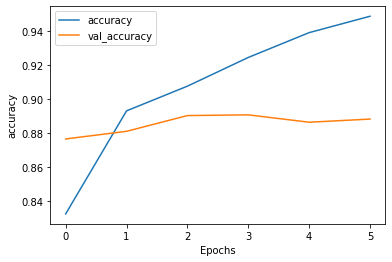

In [64]:
plot_graphs(history, 'accuracy')

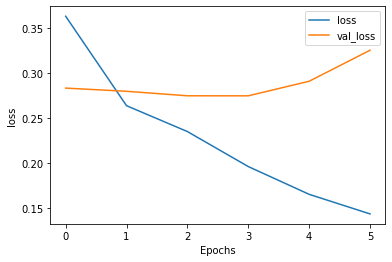

In [65]:
plot_graphs(history, 'loss')

In [66]:
tf.keras.backend.clear_session()
#sa_load = tf.keras.models.load_model('/tmp/sentiment_analysis.hdf5',compile = False)
sa_load = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/tensorflow_sentiment/final_sentiment_analysis.hdf5',compile = False)

In [67]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [68]:
def predict_fn(pred_text):
  encoded_pred_text = encoder.encode(pred_text)
  print(encoded_pred_text)
  encoded_pred_text = pad_to_size(encoded_pred_text, 32)
  print(encoded_pred_text)
  encoded_pred_text = tf.cast(encoded_pred_text, tf.float32)
  predictions = sa_load.predict(tf.expand_dims(encoded_pred_text, 0))

  return (predictions)

In [69]:
pred_text = ('This watch is pretty bad. Color and dial looks pathetic.')
predictions = predict_fn(pred_text)
print(predictions)

[65588, 72093, 42689, 51523, 61888, 29881, 72805, 69511, 69610, 45115]
[65588, 72093, 42689, 51523, 61888, 29881, 72805, 69511, 69610, 45115, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[-4.388695]]


In [70]:
pred_text = ('Color and dial does not look as advertised. Shipping was not any better as well')
predictions = predict_fn(pred_text)
print(predictions)

[29881, 72805, 69511, 73574, 65046, 26877, 70367, 70602, 63564, 46871, 65046, 59952, 60515, 70367, 68806]
[29881, 72805, 69511, 73574, 65046, 26877, 70367, 70602, 63564, 46871, 65046, 59952, 60515, 70367, 68806, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[-3.2296932]]


In [71]:
pred_text = ('Amazing product. Fast Delivery. Nice packing')
predictions = predict_fn(pred_text)
print(predictions)

[68463, 58603, 50931, 51865, 68861, 41907]
[68463, 58603, 50931, 51865, 68861, 41907, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[6.2334833]]


In [72]:
pred_text = ('Nice product. Packing could have been better')
predictions = predict_fn(pred_text)
print(predictions)

[68861, 58603, 41907, 67315, 68875, 63785, 60515]
[68861, 58603, 41907, 67315, 68875, 63785, 60515, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[2.799626]]


In [73]:
print(tf.distribute.get_strategy())

In [74]:
%reload_ext tensorboard

In [1]:
%tensorboard --logdir /content/drive/MyDrive/Colab Notebooks/tensorflow_sentiment/logs

UsageError: Line magic function `%tensorboard` not found.


In [2]:
from tensorboard import notebook
notebook.list()

No known TensorBoard instances running.


In [3]:
notebook.display(port=6006, height=1000) 

<IPython.core.display.Javascript object>